Scaling and splitting the data.


C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.9776582633736821
0.9471656576774904


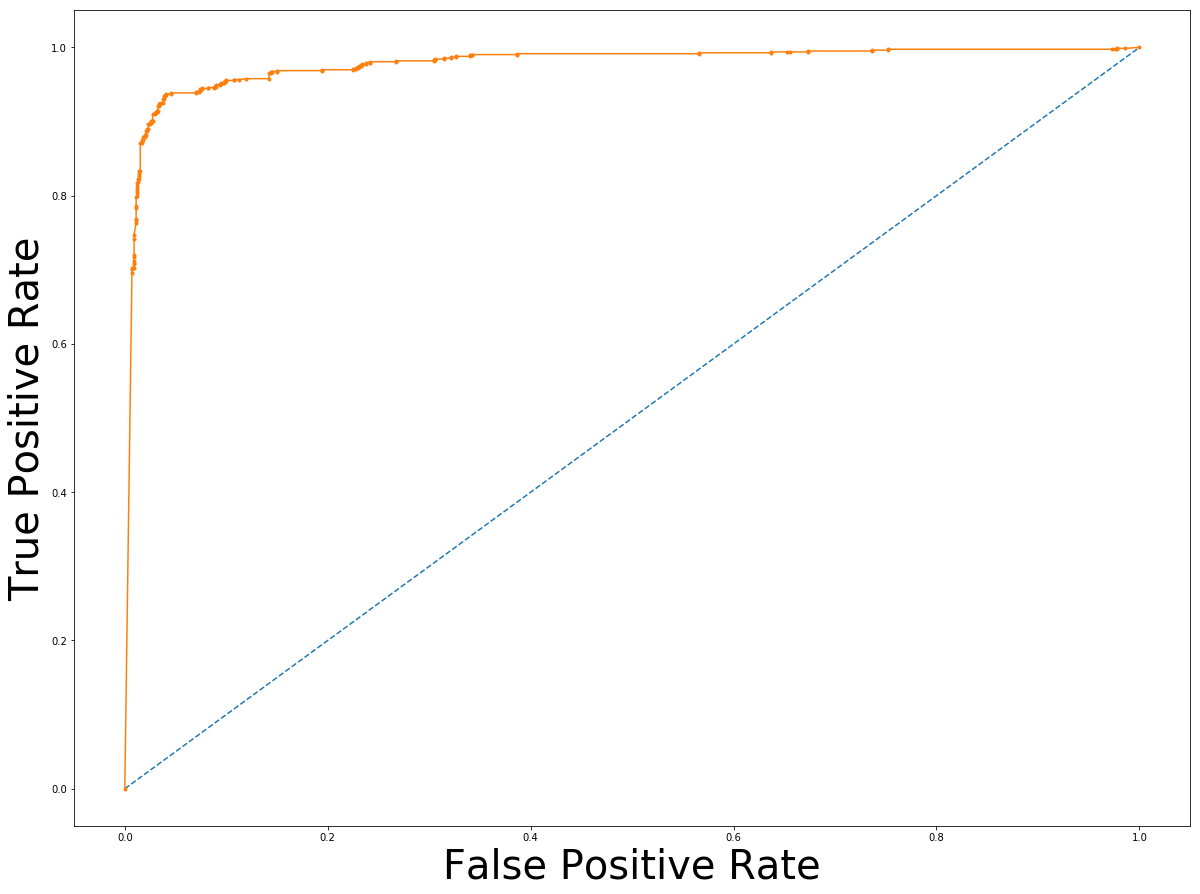

In [3]:
import pid_df
import matplotlib.pyplot as plt

initial_features = ['dEdx_SC', 'deltaPhiToHit_SC', 'dEdx_TOF', 'deltaXToHit_TOF', 'deltaYToHit_TOF', 'distanceToTrack_TOF', 'distanceToTrack_BCAL', 'dx_BCAL', 'deltaPhitoShower_BCAL', 'deltaZToShower_BCAL', 'E_BCAL', 'E_preshower_BCAL', 'E_L2_BCAL', 'E_L3_BCAL', 'E_L4_BCAL', 'sigLong_BCAL', 'sigTrans_BCAL', 'sigTheta_BCAL', 'energy_FCAL', 'DOCATrack_FCAL', 'sumU_FCAL', 'sumV_FCAL', 'E9E25_FCAL', 'E1E9_FCAL', 'chisq_track', 'Ndof_track', 'dEdx_FDC', 'dx_FDC', 'dEdx_CDC', 'dx_CDC', 'p', 'theta', 't0', 't1', 'timeAtPOCAToVertex', 'measuredBeta', 'FOM']
#initial_features = ['dEdx_SC', 'E_BCAL', 'E_preshower_BCAL', 'E_L2_BCAL', 'E_L3_BCAL', 'E_L4_BCAL', 'sigLong_BCAL', 'sigTrans_BCAL', 'energy_FCAL', 'sumU_FCAL', 'sumV_FCAL', 'E9E25_FCAL', 'E1E9_FCAL', 'dEdx_FDC', 'dEdx_CDC', 'p', 'theta']

pid_kp = pid_df.pid_df('../SingleTracks/tracks_geant3_kp.csv','kp')
pid_kp.add_df('../SingleTracks/tracks_geant3_pip.csv','pip',0.5)

p_bool_geant3 = pid_kp.pid.p < 8.0 
theta_bool_geant3 = pid_kp.pid.theta < 3.14/2
bool_geant3 = p_bool_geant3 & theta_bool_geant3

pid_kp.pid = pid_kp.pid[bool_geant3]

pid_kp.set_features(initial_features)

pid_kp.nn_model('ss')

pid_kp.predict()
pid_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp.roc_curve()
print(pid_kp.lr_auc)
print(pid_kp.accuracy)
fig.savefig('nn_kp_pip.pdf')

Scaling and splitting the data.


C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9757492190550565
0.9317556411667584


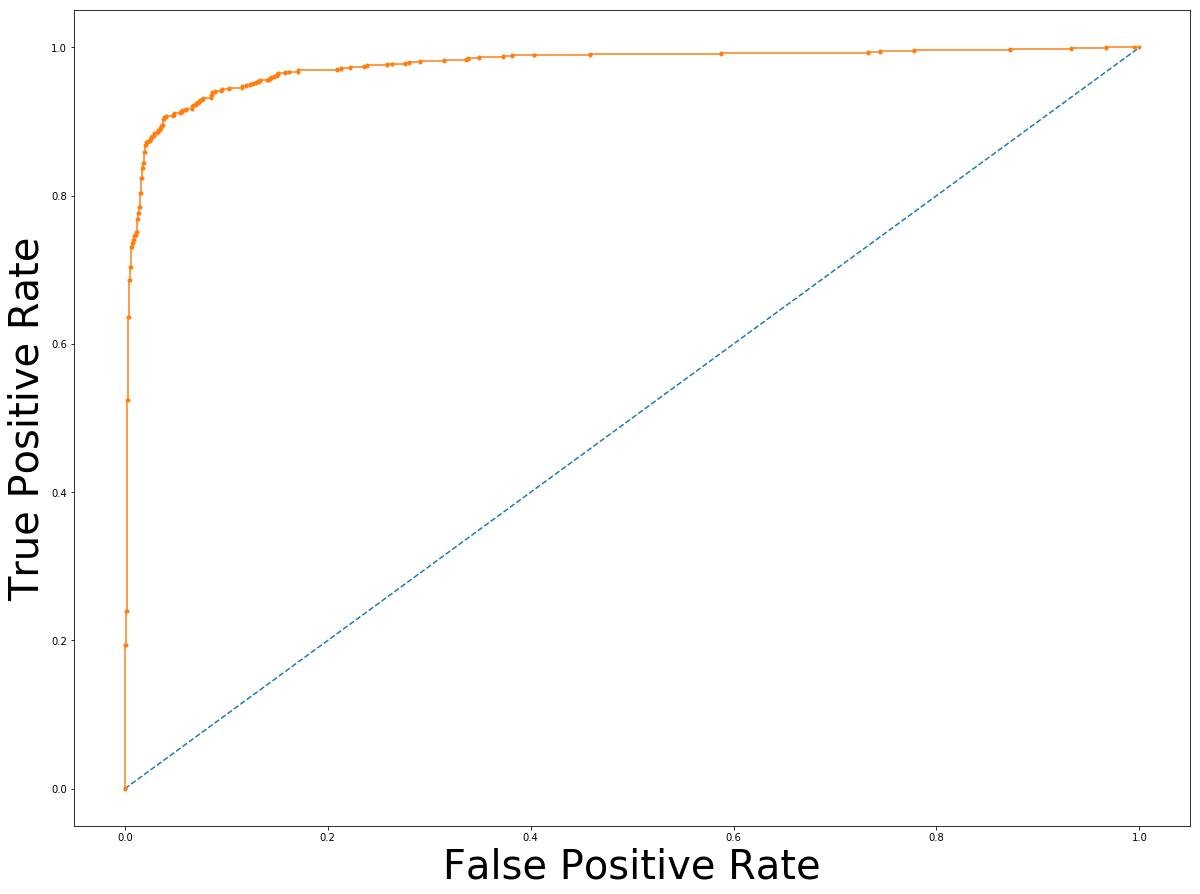

In [4]:
pid_kp.restore_df()

pid_kp.svm_model('ss')
pid_kp.predict()
pid_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp.roc_curve()
print(pid_kp.lr_auc)
print(pid_kp.accuracy)
fig.savefig('nn_kp_pip.pdf')